## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [28]:
import pandas as pd
import math
import scipy.stats as st

In [3]:
df = pd.read_csv('data/human_body_temperature.csv')

In [10]:
%matplotlib inline

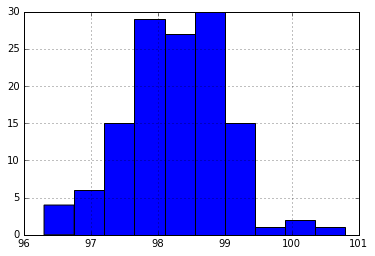

In [16]:
temps = df.temperature
temps.hist()

**1 - Is the distribution of body temperatures normal?**

Answer: From the above histogram, we can say that yes the distribution of body temperatures is approximately normal

In [30]:
temps.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [43]:
# Let the null hypothesis, H0 be that the true population mean, mew = 98.6 degrees F. Assume H0 is true...
mew = 98.6

# Find the sample standard deviation, s
s = temps.std()

# Find the standard deviation of the sample mean, omega_x_bar
omega_x_bar = s/math.sqrt(temps.count())

# Calculate Z score for sample mean, where population mean is mew (above)
z = (temps.mean() - mew)/omega_x_bar

# p-value based on z score is:
st.norm.sf(abs(z))

2.4510785070566898e-08

**2a - Is the true population mean really 98.6 degrees F?**

Answer: No, its very unlikely. We can reject the null hypothesis (above) as the chances of getting this mean from this sample of the population (temps.mean()) if the population mean = 98.6 is very low, << 1%.


**2b - In this situation, is it approriate to apply a z-test or a t-test?**

Answer: Given the sample size is large, > 30 it is appropriate to use z statistics. To calculate z statistics we need to know the standard deviation of the sample mean (denoted omega_x_bar above). From the Central Limit Theorem, omega_x_bar can be estimated to be s/sqrt(n) provided sample size, n is large (> 30 as rule of thumb)

In [49]:
# p-value of t statistic:
st.t.sf(pd.np.abs(z), temps.count()-1)

1.2053160207804971e-07

**2c - How will the result be different?**

Answer: As seen above, the p-value is larger however as n increases, the p-value will become smaller

In [71]:
# Start by computing the margin of error and confidence interval.

# Enter confidence level as a %
conf_lev = 95.0 # If we sssume abnormal temperatures are in the top 2.5% or bottom 2.5%

# Calculate the critical probability (e.g 95% conf interval as crit_prob = 0.975)
crit_prob = (50 + conf_lev/2)/100

# Calculate the z value (critial value) would need to between 0 +/- answer-below to be not abnormal
z_value = st.norm.ppf(crit_prob)
z_value

1.959963984540054

In [72]:
# Calculate the margin of error
margin_of_err = z_value * omega_x_bar
margin_of_err

0.1260343410491174

In [74]:
# Calculate the lower and upper bounds of the confidence interval
lower, upper = -margin_of_err + temps.mean(), margin_of_err + temps.mean()
lower, upper

(98.123196428181657, 98.375265110279898)

**3 - At what temperature should we consider someone's temperature to be "abnormal"?**

Answer: We are 95% confident that temperatures will fall between 98.12 and 98.37 degrees F. Should it fall outside of this range then perhaps we can consider someone's temperature to be "abnormal".

In [83]:
# Split the sample into two samples, female temps 'fem' and male temps 'mal'
fem, mal = df[df.gender=='F'].temperature, df[df.gender=='M'].temperature

In [86]:
# Set up and solve for a two sample hypothesis testing.

# Let the null hypothesis, H0 be that there is no difference between samples fem and mal,
# hence their population means are the same: mew_fem = mew_mal OR mew-fem - mew_mal = 0

# Find the standard deviation of the sample mean of: mew_fem - mew_mal, omega_diff_bar
omega_diff_bar = math.sqrt(fem.var()/fem.count()+mal.var()/mal.count())

# Calculate Z score for difference of sample means under the null hypothesis, ie mew-fem - mew_mal = 0
z = (fem.mean()-mal.mean() - 0)/omega_diff_bar

# p-value based on z score is:
st.norm.sf(abs(z))

0.01114368038033863

**4 - Is there a significant difference between males and females in normal temperature?**

Answer: Depending on ones definition of the word 'significant', many would say yes. Based on Allen Powey's definition this p-value of 1.1% is borderline (1% <= p < 10%), ie we cannot reject the null hypothesis as say the difference is probably not due to chance, nor can we say this difference is plausible due to chance.

We could probably look at other more important factors like effect size to investigate further.